In [1]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

from tensorflow import keras
import tensorflow as tf
tf.config.run_functions_eagerly(True)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2023-07-14 21:28:50.266711: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# rescale the images
X_train_full= X_train_full / 255
X_test= X_test / 255

# split to train val test
n_val= 10_000
X_val= X_train_full[:n_val].copy()
y_val= y_train_full[:n_val].copy()
X_train= X_train_full[n_val:].copy()
y_train= y_train_full[n_val:].copy()

# encode the label
encoder= OneHotEncoder(sparse_output= False, drop= None, 
                       handle_unknown= 'ignore')

encoder.fit(y_train.reshape(-1, 1))
y_train= encoder.transform(y_train.reshape(-1, 1))
y_val= encoder.transform(y_val.reshape(-1, 1))
y_test= encoder.transform(y_test.reshape(-1, 1))

In [3]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [4]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000, 10)
(10000, 28, 28) (10000, 10)
(10000, 28, 28) (10000, 10)


In [5]:
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# With TF

In [6]:
model= keras.Sequential()

# conv1
model.add(Conv2D(filters= 4, 
                 kernel_size= (3, 3),
                 strides= 1, 
                 padding= 'same', 
                 activation= 'relu', 
                 # only need to specify input shape here
                 input_shape= (28, 28, 1))) 
model.add(MaxPooling2D(pool_size= (2, 2)))

# conv 2
model.add(Conv2D(filters= 8, 
                 kernel_size= (3, 3),
                 strides= 1, 
                 padding= 'same', 
                 activation= 'relu',))
model.add(MaxPooling2D(pool_size= (2, 2)))

# fully connected layers
model.add(Flatten())
model.add(Dropout(rate= 0.3))
model.add(Dense(units= 64, activation='relu'))
model.add(Dropout(rate= 0.5))
model.add(Dense(units= 10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dropout (Dropout)           (None, 392)               0

2023-07-14 21:28:52.642199: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 21:28:52.645779: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.compile(loss='categorical_crossentropy', 
              optimizer= 'rmsprop', 
              metrics= ['accuracy'])

In [8]:
hist= model.fit(x= X_train, 
                y= y_train,
                batch_size= 32, 
                epochs= 10, 
                validation_data= (X_val, y_val),
                verbose= 1, 
                shuffle= True)

Epoch 1/10


/home/anj/miniconda3/envs/deep-learning/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1563/1563 [==============================] - 35s 23ms/step - loss: 0.6024 - accuracy: 0.8042 - val_loss: 0.1499 - val_accuracy: 0.9585
Epoch 2/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.2709 - accuracy: 0.9206 - val_loss: 0.1149 - val_accuracy: 0.9673
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.2234 - accuracy: 0.9341 - val_loss: 0.1014 - val_accuracy: 0.9717
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.2018 - accuracy: 0.9408 - val_loss: 0.0890 - val_accuracy: 0.9746
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.1967 - accuracy: 0.9426 - val_loss: 0.0868 - val_accuracy: 0.9753
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.1874 - accuracy: 0.9457 - val_loss: 0.0917 - val_accuracy: 0.9743
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.1824 - accuracy: 0.9474 - val_loss: 0.0871 - val_accura

In [9]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

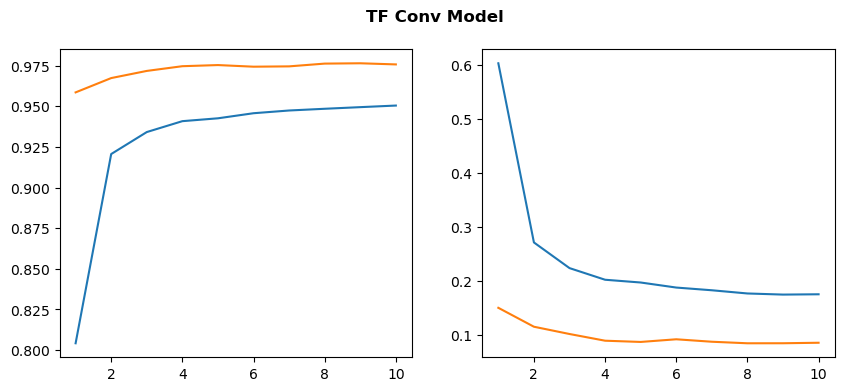

In [10]:
train_acc= hist.history['accuracy']
val_acc= hist.history['val_accuracy']
train_loss= hist.history['loss']
val_loss= hist.history['val_loss']
epochs= list(range(1, len(train_acc) + 1))

import matplotlib.pyplot as plt

fig, axs= plt.subplots(ncols= 2, figsize=(10, 4))
axs[0].plot(epochs, train_acc)
axs[0].plot(epochs, val_acc)

axs[1].plot(epochs, train_loss)
axs[1].plot(epochs, val_loss)

plt.suptitle('TF Conv Model', fontweight= 'bold')

plt.show()

# With Pytorch

In [11]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

In [12]:
np.argmax(y_train, axis= 1)

array([3, 8, 7, ..., 5, 6, 8])

In [13]:
# create dataset

# add in dimension as channel
X_train_tensor= torch.tensor(X_train.reshape(-1, 1, 28, 28)).float()
X_val_tensor= torch.tensor(X_val.reshape(-1, 1, 28, 28)).float()
X_test_tensor= torch.tensor(X_test.reshape(-1, 1, 28, 28)).float()

y_train_tensor= torch.tensor(np.argmax(y_train, axis= 1))
y_val_tensor= torch.tensor(np.argmax(y_val, axis= 1))
y_test_tensor= torch.tensor(np.argmax(y_test, axis= 1))

train_ds= TensorDataset(X_train_tensor, y_train_tensor)
val_ds= TensorDataset(X_val_tensor, y_val_tensor)

train_dl= DataLoader(train_ds, batch_size= 128)
val_dl= DataLoader(val_ds, batch_size= 128)

In [14]:
# create model

class CNN(nn.Module):

    def __init__(self,):
        super().__init__()
        self.conv_layers= nn.Sequential(
            nn.Conv2d(in_channels= 1, # 1 for grayscale image
                      out_channels= 4, 
                      kernel_size= 5,
                      stride= 1, 
                      padding= 2), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size= 2),
            nn.Conv2d(in_channels= 4, # output from the last layer
                      out_channels= 8, 
                      kernel_size= 5,
                      stride= 1, 
                      padding= 2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2)
        )
        self.fc_layers= nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features= 392, # output from flatten
                      out_features= 32),
            nn.ReLU(),
            nn.Dropout(p= 0.3),
            nn.Linear(in_features= 32, 
                      out_features= 10),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [15]:
x= torch.ones(128, 1, 28, 28)
model= CNN()
model(x).shape

torch.Size([128, 10])

In [16]:
learning_rate= 0.001
n_train_samples= len(train_dl.dataset)
n_val_samples= len(val_dl.dataset)

model= CNN()
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(), lr= learning_rate)

n_epochs= 10
log_print= 1 # print every 2 epoch

acc_hist_train= [0] * n_epochs
acc_hist_val= [0] * n_epochs

loss_hist_train= [0] * n_epochs
loss_hist_val= [0] * n_epochs

for epoch in range(n_epochs):

    model.train()
    for x_batch, y_batch in train_dl:
        
        y_pred_proba= model(x_batch)
        y_pred= torch.argmax(y_pred_proba, dim= 1)
        
        # backprop
        loss= loss_fn(y_pred_proba, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        # get acc
        is_correct= (y_pred == y_batch).float().sum()
        
        acc_hist_train[epoch] += is_correct.detach()
        loss_hist_train[epoch] += loss.detach()
    
    acc_hist_train[epoch] /= n_train_samples
    loss_hist_train[epoch] /= n_train_samples

    model.eval()
    with torch.no_grad():
        for x_batch, y_batch in val_dl:
            
            y_pred_proba= model(x_batch)
            y_pred= torch.argmax(y_pred_proba, dim= 1)
            
            loss= loss_fn(y_pred_proba, y_batch)

            # get acc
            is_correct= (y_pred == y_batch).float().sum()
            
            acc_hist_val[epoch] += is_correct.detach()
            loss_hist_val[epoch] += loss.detach()
        
        acc_hist_val[epoch] /= n_val_samples
        loss_hist_val[epoch] /= n_val_samples

    if (epoch + 1) % log_print == 0: 
        acc= acc_hist_train[epoch]
        loss= loss_hist_train[epoch]
        val_acc= acc_hist_val[epoch]
        val_loss= loss_hist_val[epoch]

        print(f'epoch {epoch} : acc = {acc: .4f} - val acc = {val_acc: .4f} - '
        f'loss = {loss: .4f} - val loss = {val_loss: .4f}'
        )

epoch 0 : acc =  0.7404 - val acc =  0.9225 - loss =  0.0063 - val loss =  0.0019
epoch 1 : acc =  0.9066 - val acc =  0.9553 - loss =  0.0024 - val loss =  0.0012
epoch 2 : acc =  0.9295 - val acc =  0.9626 - loss =  0.0018 - val loss =  0.0010
epoch 3 : acc =  0.9381 - val acc =  0.9680 - loss =  0.0016 - val loss =  0.0009
epoch 4 : acc =  0.9455 - val acc =  0.9716 - loss =  0.0014 - val loss =  0.0008
epoch 5 : acc =  0.9480 - val acc =  0.9711 - loss =  0.0013 - val loss =  0.0008
epoch 6 : acc =  0.9536 - val acc =  0.9748 - loss =  0.0012 - val loss =  0.0007
epoch 7 : acc =  0.9558 - val acc =  0.9761 - loss =  0.0011 - val loss =  0.0007
epoch 8 : acc =  0.9572 - val acc =  0.9788 - loss =  0.0011 - val loss =  0.0007
epoch 9 : acc =  0.9606 - val acc =  0.9785 - loss =  0.0010 - val loss =  0.0006


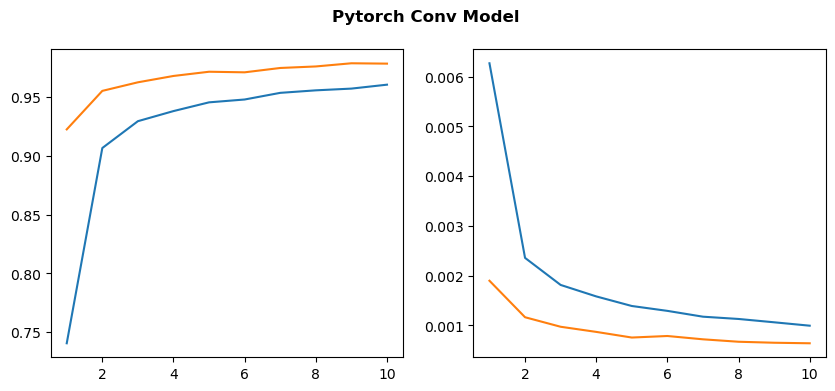

In [17]:
epochs= list(range(1, len(acc_hist_train) + 1))

import matplotlib.pyplot as plt

fig, axs= plt.subplots(ncols= 2, figsize=(10, 4))
axs[0].plot(epochs, acc_hist_train)
axs[0].plot(epochs, acc_hist_val)

axs[1].plot(epochs, loss_hist_train)
axs[1].plot(epochs, loss_hist_val)

plt.suptitle('Pytorch Conv Model', fontweight= 'bold')

plt.show()